# Pymaceuticals Inc.
---

### Analysis

Out of all the drug treatment groups, Capomulin and Ramicane have the most promising results. The summary statistics table shows that these two have the smallest mean and median tumor volumes. Ketapril has the largest average tumor volume at 55.2 mm3, while Capomulin has the second smallest at 40.68 mm3 and Ramicane has the smallest at 40.22 mm3. Capomulin and Ramicane are the only two drug regimens that have an average tumor volume below 50 mm3. It is important to note that both of these drugs also have the smallest variance and standard deviation in the group. They also have the largest sample size, as they have the highest number of observed mouse timepoints. 

The effectiveness of Capomulin and Ramicane is further supported by the "Distribution of Tumor Volume by Treatment Group" box plot, which charts the distribution of final tumor volumes for each of the four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. The plot shows that Infubinol and Ceftamin have higher variability in treatment outcomes and that Infubinol has the most significant outliers. This data might suggest that Infubinol and Ceftamin work well on some mice, while being less effective on others. The variance in tumor size may be related to other underlying factors and pre-exisisting conditions that are not accounted for in the study. 

The "Mouse Weight vs. Avg Tumor Volume" scatter plots present the potential impact that mouse weight has on tumor size. The correlation coefficient between mouse weight and the average tumor volume is 0.84, suggesting a strong positive correlation between the two. As mice increase in size, their tumors tend to increase in size as well. In order to get the most accurate results, the average weight of the mice must remain consistent across the treatment groups.  

The line plot for a single mouse treated with Capomulin is a positive indication for the potential effectiveness of the Capomulin treatment, as it shows the tumor volume decreasing throughout the 45 day treatment period. Creating a similar visual representation for every mouse in the study may indicate a need to further investigate the efficacy of Capomulin towards the end of the 45 day treatment period. The line chart for a single mouse shows that there are some instances in which the tumor volume begins to spike between the 30 to 45 day mark. However, this observation is based on too small of a sample size to make any meaningful conclusions.  


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking for the number of mice
mouse_metadata.count()


Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
#Checking for number of mice in merged dataframe
mouse_study_complete.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete[mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_complete[mouse_study_complete["Mouse ID"].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_complete[~mouse_study_complete["Mouse ID"].isin(duplicate_mice)]
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_statistics = mouse_study_cleaned.groupby("Drug Regimen")
regimen_summary = pd.DataFrame({"Mean Tumor Volume":regimen_statistics["Tumor Volume (mm3)"].mean(),"Median Tumor Volume":regimen_statistics["Tumor Volume (mm3)"].median(),"Tumor Volume Variance":regimen_statistics["Tumor Volume (mm3)"].var(),"Tumor Volume Std. Dev.":regimen_statistics["Tumor Volume (mm3)"].std(),"Total Volume Std. Err.":regimen_statistics["Tumor Volume (mm3)"].sem()})
regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Total Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_agg = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
bar_chart_regimen = mouse_study_cleaned['Drug Regimen'].value_counts()
bar_chart_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: title={'center': 'Mouse ID/Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse TimePoints'>

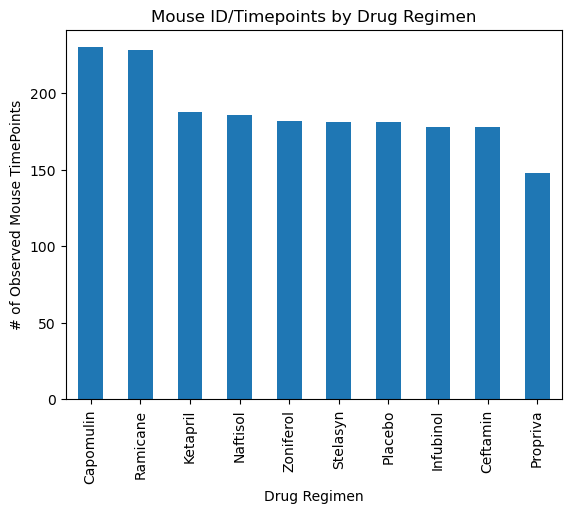

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_regimen.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse TimePoints", title="Mouse ID/Timepoints by Drug Regimen")


<function matplotlib.pyplot.show(close=None, block=None)>

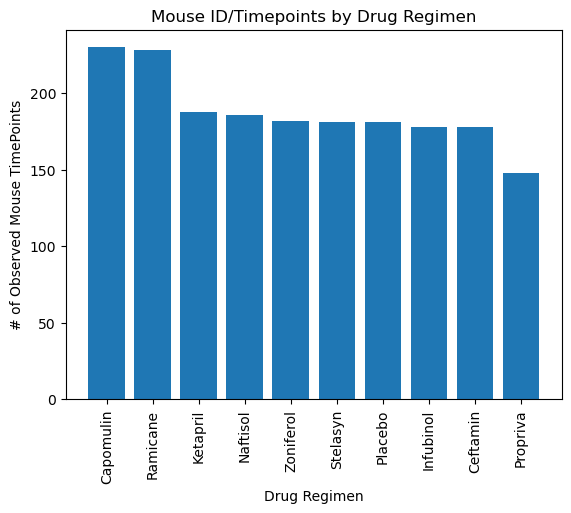

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_chart_regimen.index, bar_chart_regimen.values)
plt.title("Mouse ID/Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse TimePoints")
plt.xticks(rotation=90)
plt.show

<Axes: title={'center': 'Mouse Sex'}, ylabel='Sex'>

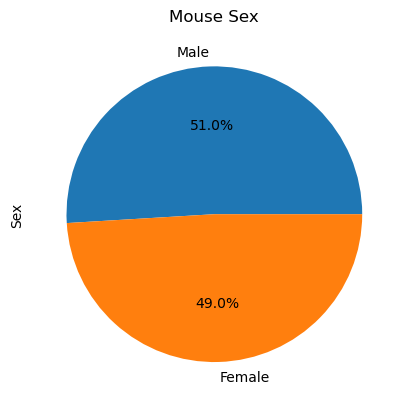

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = mouse_study_cleaned['Sex'].value_counts()
mice_sex.plot(kind='pie', autopct='%1.1f%%',ylabel='Sex',title="Mouse Sex")


<function matplotlib.pyplot.show(close=None, block=None)>

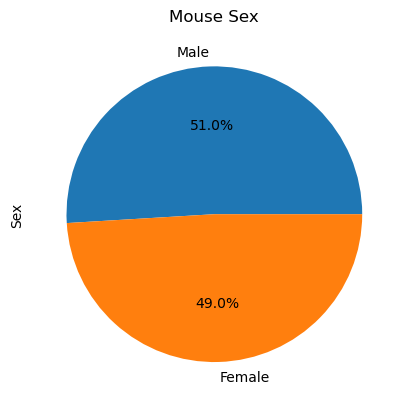

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex.values, labels=mice_sex.index, autopct="%1.1f%%")
plt.title("Mouse Sex")
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_cleaned.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merged = pd.merge(last_timepoint,mouse_study_cleaned,on=['Mouse ID','Timepoint'],how='left')



In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint_merged.loc[last_timepoint_merged['Drug Regimen']== treatment,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


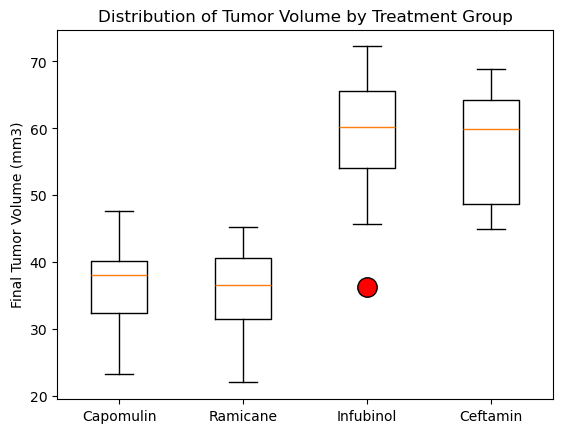

In [17]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Highlight any potential outliers in the plot by changing their color and style
flierprops = dict(marker='o', markerfacecolor='r', markersize=14)
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=flierprops)
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

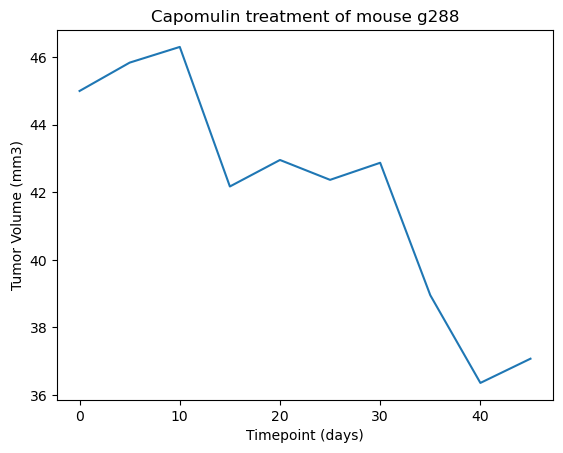

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Randomly select mouse treated with Capomulin
capomulin_mouse_id = mouse_study_cleaned[mouse_study_cleaned['Drug Regimen'] == 'Capomulin']['Mouse ID'].sample(n=1).iloc[0]
# Get the data for the randomly selected mouse id
capomulin_mouse_data = mouse_study_cleaned[(mouse_study_cleaned["Drug Regimen"] == "Capomulin") & (mouse_study_cleaned["Mouse ID"] == capomulin_mouse_id)]
#Plot 
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {capomulin_mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

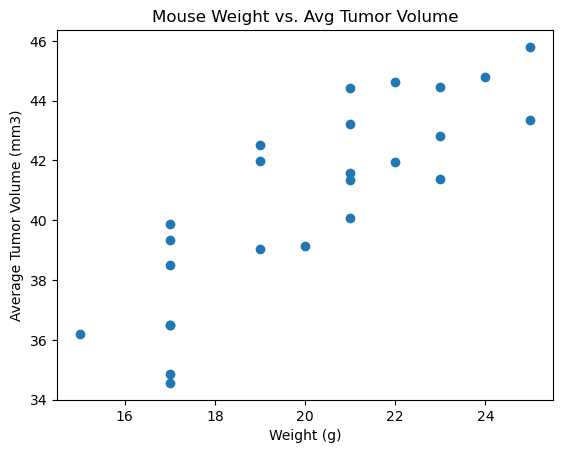

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create new dataframe for the entire Capomulin regimen
capomulin_df = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]

# Group by mouse id and  calculate the average tumor volume and weight
capomulin_avg = capomulin_df.groupby("Mouse ID").agg(avg_tumor_volume=("Tumor Volume (mm3)", "mean"),weight=("Weight (g)", "mean")).reset_index()

# Generate the scatter plot
x_axis = capomulin_avg["weight"]
y_axis = capomulin_avg["avg_tumor_volume"]
plt.scatter(x_axis, y_axis)
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


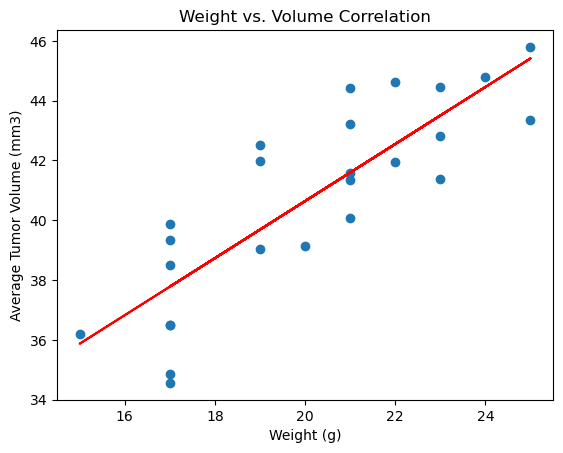

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# Calculate the correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
# Print correlation coefficient 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# Set up a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Weight vs. Volume Correlation")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

